# Dependencies

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

In [63]:
from PIL import Image
import requests
from wordcloud import WordCloud, STOPWORDS 

In [64]:
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px
import plotly.tools as tls
py.init_notebook_mode(connected=True)

In [65]:
# Always good to set a seed for reproducibility
import numpy as np
SEED = 7
np.random.seed(SEED)

# Basic EDA

In [66]:
df = pd.read_csv("../input/iris.csv")
titanic = sns.load_dataset("titanic")

In [67]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [68]:
df.shape

(150, 6)

In [69]:
df_name=df.columns
df_name

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [70]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [71]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [72]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [ ]:
#typecasting

# datetime
df['date'] = pd.to_datetime(df.date)

# categorical variables
hour_df['season'] = hour_df.season.astype('category')

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [74]:
titanic['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

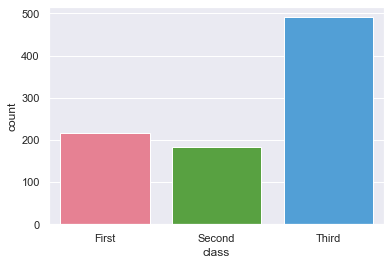

In [75]:
ax = sns.countplot(x="class", data=titanic,palette='husl')

In [ ]:
#Filtering data
def cleanup_column_names(df, rename_dict={}, do_inplace=True):
    
    if not rename_dict:
        return df.rename(columns={col: col.lower().replace(' ','_') for col in df.columns.values.tolist()},inplace=do_inplace)
    else:
        return df.rename(columns=rename_dict,inplace=do_inplace)


print("Select Specific row indices::")
print(df.iloc[[10,501,20]] )

print(Excluding Specific Row indices::" )
print(df.drop([0,24,51], axis=0).head())

print("Subsetting based on logical condition(s)::" )
print(df[df.quantity_purchased>25].head())

print("Subsetting based on offset from top (bottom)::" )
print(df[100:].head() #df.tail(-100) )

In [ ]:
data_male = data[data['please_select_the_gender_of_the_person_in_the_picture']=="male"].reset_index(drop='index')
final_data = pd.concat([data_male[:1000],data_female[:1000]],axis=0).reset_index(drop='index')

In [ ]:
#Data Summarization:
print(df.groupby(['user_class'])['quantity_purchased'].sum())

# variant-1: multiple aggregations on single attribute
df.groupby(['user_class'])['quantity_purchased'].agg([np.sum, np.mean,np.count_nonzero])

# variant-2: different aggregation functions for each attribute
df.groupby(['user_class','user_type']).agg({'price':np.mean,'quantity_purchased':np.max})

# variant-3
df.groupby(['user_class','user_type']).agg({'price':{'total_price':np.sum,'mean_price':np.mean,'variance_price':np.std,'count':np.count_nonzero},'quantity_purchased':np.sum})


In [76]:
# find categorical variables
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 1 categorical variables


In [77]:
# find numerical variables
numerical = [var for var in df.columns if df[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 5 numerical variables


In [78]:
# find discrete variables
discrete = []
for var in numerical:
    if len(df[var].unique())<20:
        print(var, ' values: ', df[var].unique())
        discrete.append(var)
        
print('There are {} discrete variables'.format(len(discrete)))

There are 0 discrete variables


# Distribution

In [79]:
def hist_plot(df,bins):
    df.hist(bins = bins, figsize = (20,15))
    plt.show()
    
def hist_plot2(df,column):
    import plotly.express as px
    fig = px.histogram(df, x=column, nbins=20)
    fig.show()

def density_plot(data_frame, column,bins):
    sns.distplot(data_frame[column],bins=bins)
    plt.show()
    # skewness and kurtosis
    print("Skewness: %f" % data_frame[column].skew())
    print("Kurtosis: %f" % data_frame[column].kurt())    

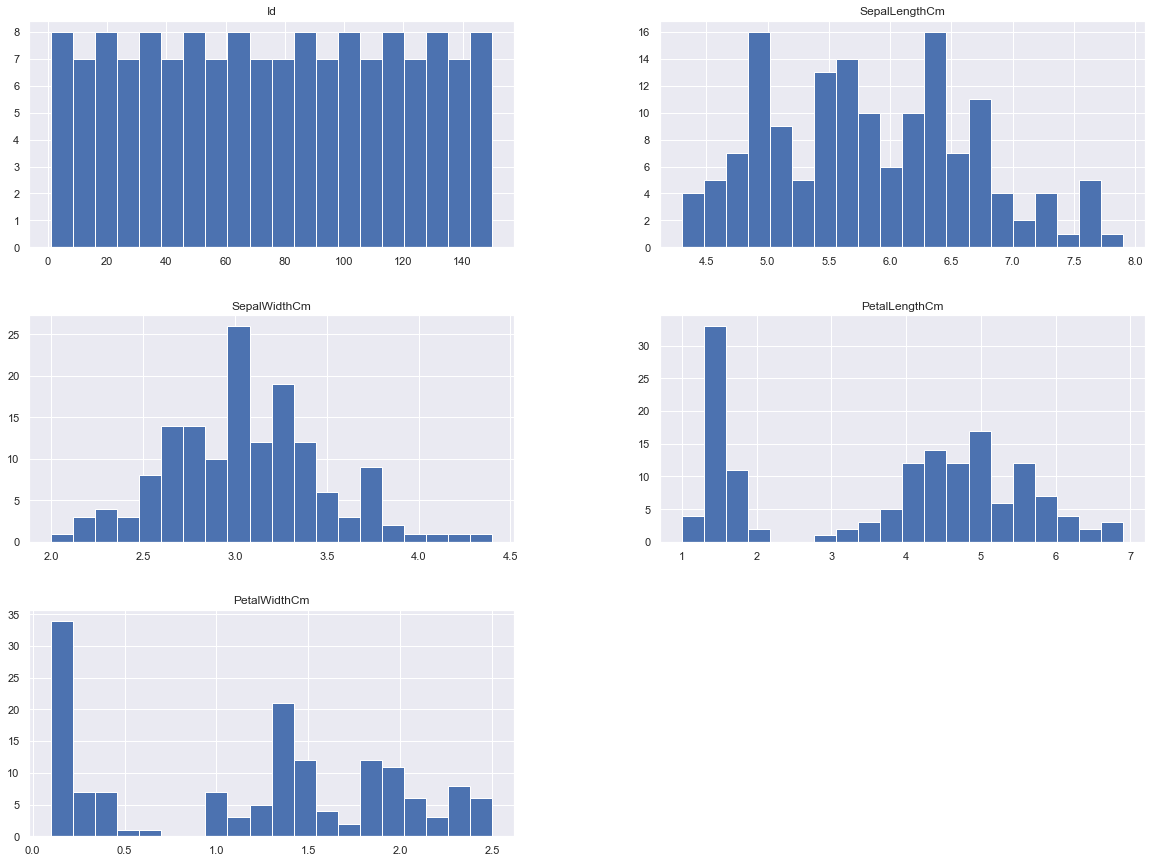

In [80]:
hist_plot(df,bins=20)

In [81]:
hist_plot2(df,df_name[1])

C:\Users\Win10\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



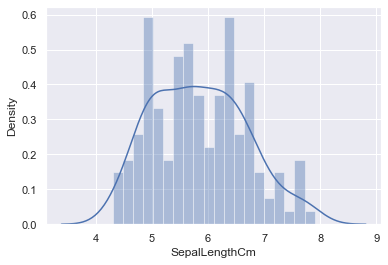

Skewness: 0.314911
Kurtosis: -0.552064


In [82]:
density_plot(df,df_name[1],bins=20)

# Missing Data

In [83]:
df.isnull().mean()

Id               0.0
SepalLengthCm    0.0
SepalWidthCm     0.0
PetalLengthCm    0.0
PetalWidthCm     0.0
Species          0.0
dtype: float64

In [86]:
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
        columns={0: 'Missing Values', 1: '% of Total Values'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
                                                              "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [88]:
missing_values_table(titanic)

Your selected dataframe has 15 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
deck,688,77.2
age,177,19.9
embarked,2,0.2
embark_town,2,0.2


In [84]:
def missing_data_plot(data_frame):
    data_frame_na = (data_frame.isnull().sum() / len(data_frame)) * 100
    data_frame_na = data_frame_na.drop(data_frame_na[data_frame_na == 0].index).sort_values(ascending=False)[:30]
    missing_data = pd.DataFrame({'Missing Ratio': data_frame_na})
    f, ax = plt.subplots(figsize=(8, 6))
    plt.xticks(rotation='90')
    sns.barplot(x=data_frame_na.index, y=data_frame_na)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    plt.show()

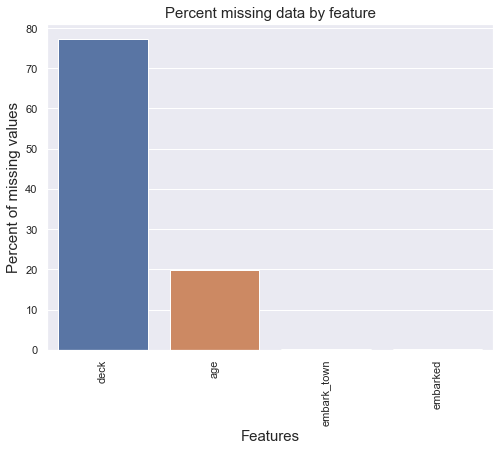

In [85]:
missing_data_plot(titanic)

In [ ]:
#Imputing missing values
print("Drop Rows with missing dates::" )
df_dropped = df.dropna(subset=['date'])
print("Shape::",df_dropped.shape)

print("Fill Missing user_type values with value from previous row (forward fill) ::" )
df_dropped['user_type'].fillna(method='ffill',inplace=True)

print("Fill Missing user_type values with value from next row (backward fill) ::" )
df_dropped['user_type'].fillna(method='bfill',inplace=True)

mean-median imputation
print("Fill Missing Price values with mean price::" )
df_dropped['price'].fillna(value=np.round(df.price.mean(),decimals=2),inplace=True)

In [ ]:
# use 3 nearest neighbours to fill na values
knn_imputer = impute.KNNImputer(n_neighbors=2)
knn_imputer.fit_transform(X)

In [ ]:
If you ever encounter missing
values in categorical features, treat is as a new category!

Another way of imputing missing values in a column would be to train a regression
model that tries to predict missing values in a column based on other columns

Always remember that imputing values for tree-based models is unnecessary as they
can handle it themselves

And always remember to scale or normalize your
features if you are using linear models like logistic regression or a model like SVM.
Tree-based models will always work fine without any normalization of features.

# Outliers

In [31]:
def boxplot(df,nameOfFeature):
    
    trace0 = go.Box(
        y = df[nameOfFeature],
        name = "All Points",
        jitter = 0.3,
        pointpos = -1.8,
        boxpoints = 'all',
        marker = dict(
            color = 'rgb(7,40,89)'),
        line = dict(
            color = 'rgb(7,40,89)')
    )

    trace1 = go.Box(
        y = df[nameOfFeature],
        name = "Only Whiskers",
        boxpoints = False,
        marker = dict(
            color = 'rgb(9,56,125)'),
        line = dict(
            color = 'rgb(9,56,125)')
    )

    trace2 = go.Box(
        y = df[nameOfFeature],
        name = "Suspected Outliers",
        boxpoints = 'suspectedoutliers',
        marker = dict(
            color = 'rgb(8,81,156)',
            outliercolor = 'rgba(219, 64, 82, 0.6)',
            line = dict(
                outliercolor = 'rgba(219, 64, 82, 0.6)',
                outlierwidth = 2)),
        line = dict(
            color = 'rgb(8,81,156)')
    )

    trace3 = go.Box(
        y = df[nameOfFeature],
        name = "Whiskers and Outliers",
        boxpoints = 'outliers',
        marker = dict(
            color = 'rgb(107,174,214)'),
        line = dict(
            color = 'rgb(107,174,214)')
    )

    data = [trace0,trace1,trace2,trace3]

    layout = go.Layout(
        title = "{} Outliers".format(nameOfFeature)
    )

    fig = go.Figure(data=data,layout=layout)
    py.iplot(fig, filename = "Outliers")

In [32]:
boxplot(df,df_name[2])

In [ ]:
the presence of outliers affects the performance of AdaBoost
Logistic Regression's and Random Forests performances seemed unaffected by outliers

In [ ]:
#remove outliers

In [ ]:
def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# detect outliers from Age, SibSp , Parch and Fare
Outliers_to_drop = detect_outliers(train,2,["Age","SibSp","Parch","Fare"])

In [ ]:
# Drop outliers
train = train.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

# Q -> Q (Quantitative to Quantitative relationship)

### regplot 

In [28]:
def pair_plot(data_frame,hue):
    sns.set()
    sns.pairplot(data_frame, height=2.5,palette="husl",hue=hue)
    plt.show()

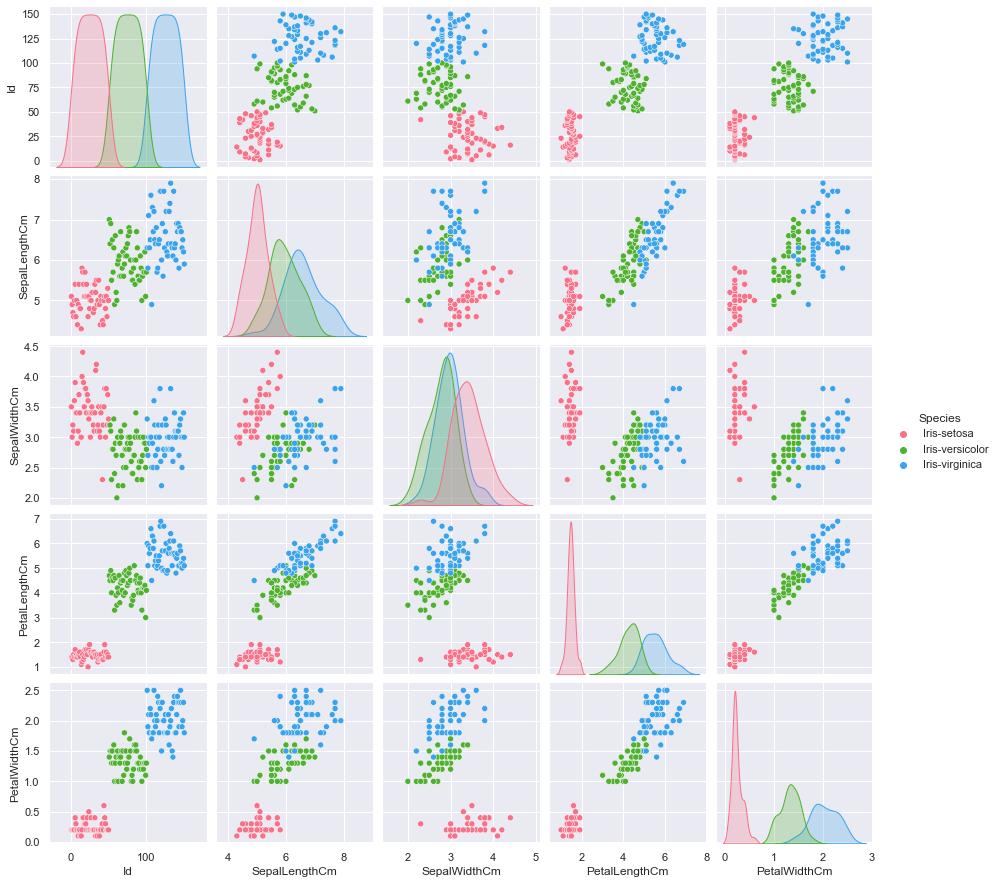

In [29]:
pair_plot(df,hue='Species')

In [30]:
fig = px.scatter(df, x="SepalLengthCm", y="PetalLengthCm", trendline="ols")
fig.show()

C:\Users\Win10\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning:

The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version



In [36]:
def heatmap(df):
    df_corr = df.corr()
    fig, ax = plt.subplots(figsize=(12, 10))
    mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
    mask = mask[1:, :-1]
    corr = df_corr.iloc[1:,:-1].copy()
    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
    sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", 
           linewidths=5, cmap=cmap, vmin=-1, vmax=1, 
           cbar_kws={"shrink": .8}, square=True)
    yticks = [i.upper() for i in corr.index]
    xticks = [i.upper() for i in corr.columns]
    plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
    plt.xticks(plt.xticks()[0], labels=xticks)
    title = 'CORRELATION MATRIX\n'
    plt.title(title, loc='left', fontsize=18)
    plt.show()

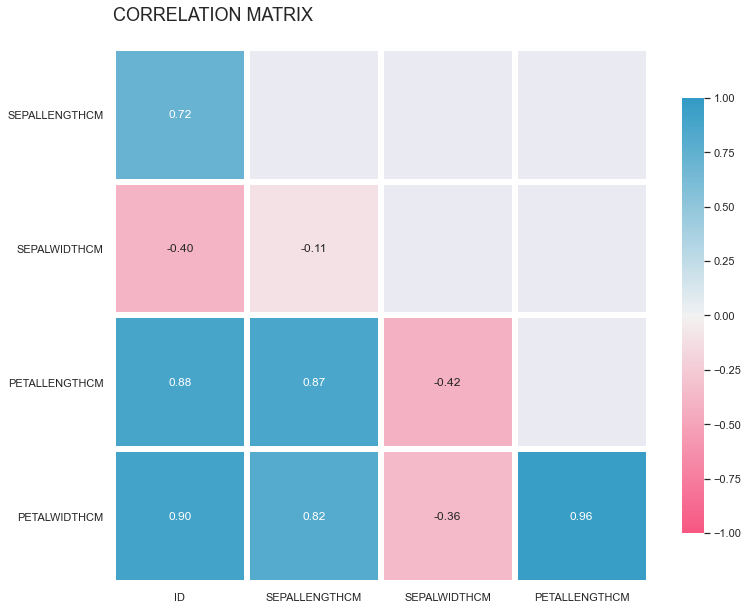

In [37]:
heatmap(df)

In [ ]:
#remove highly correlated

# C -> Q (Categorical to Quantitative relationship)

### boxplot

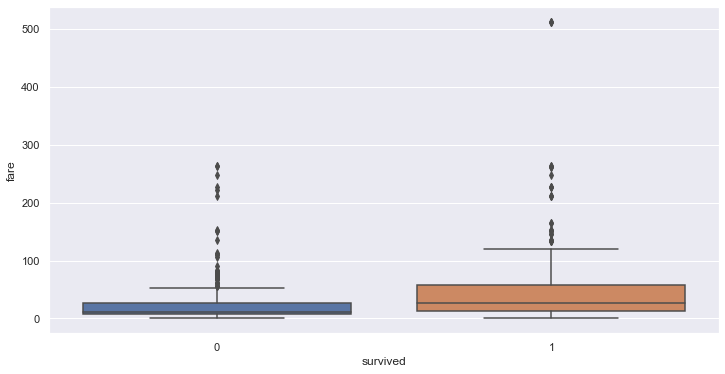

In [45]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x='survived', y='fare', data=titanic)

<AxesSubplot:xlabel='survived', ylabel='fare'>

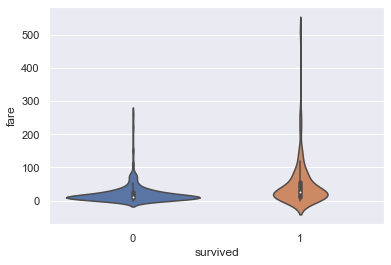

In [47]:
sns.violinplot(x='survived', y='fare', data=titanic)

C:\Users\Win10\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

72.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\Win10\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

46.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



<AxesSubplot:xlabel='survived', ylabel='fare'>

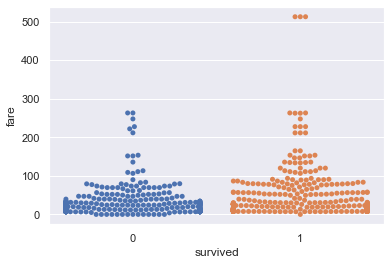

In [48]:
sns.swarmplot(x='survived', y='fare', data=titanic)

<AxesSubplot:xlabel='survived', ylabel='fare'>

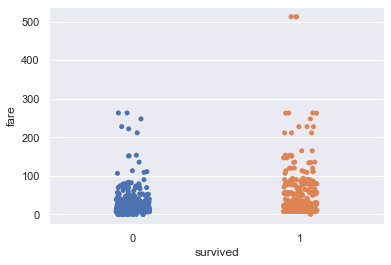

In [49]:
sns.stripplot(x='survived', y='fare', data=titanic)

<AxesSubplot:xlabel='survived', ylabel='fare'>

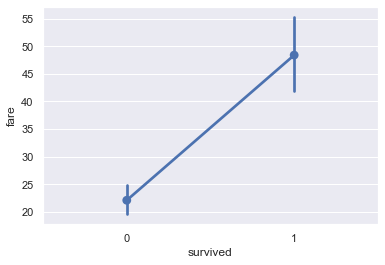

In [50]:
sns.pointplot(x='survived', y='fare', data=titanic)

<AxesSubplot:xlabel='survived', ylabel='fare'>

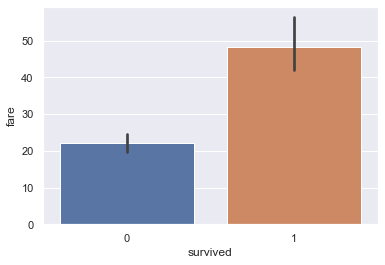

In [51]:
sns.barplot(x='survived', y='fare', data=titanic)

# Wordcloud

In [60]:
def wordcloud(text):
    pic = np.array(Image.open(requests.get('http://www.clker.com/cliparts/O/i/x/Y/q/P/yellow-house-hi.png',stream=True).raw))
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                 mask = pic, 
                min_font_size = 10).generate(text)
    plt.figure(figsize = (10, 10), facecolor = 'white', edgecolor='blue')
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()
    

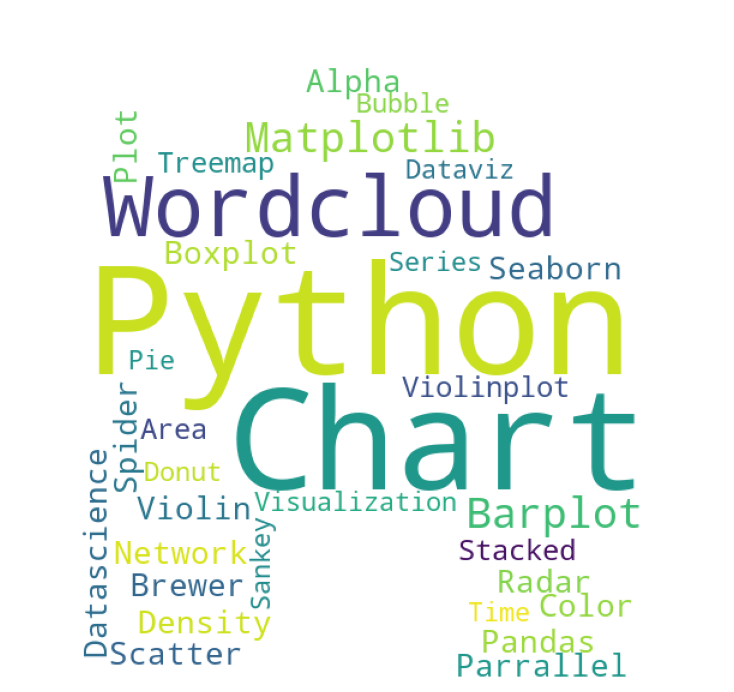

In [61]:
stopwords=("Python Python Python Matplotlib Matplotlib Seaborn Network Plot Violin Chart Pandas Datascience Wordcloud Spider Radar Parrallel Alpha Color Brewer Density Scatter Barplot Barplot Boxplot Violinplot Treemap Stacked Area Chart Chart Visualization Dataviz Donut Pie Time-Series Wordcloud Wordcloud Sankey Bubble")
 
wordcloud(stopwords)

# Piechart

# Line/Area chart